In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [12]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


In [13]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

In [14]:
data_test = pd.read_csv("./data/genresTest.csv")
data_test.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


In [15]:
m_cor = data_train.corr()

dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>0.9].index})
    
cols_drop = []
for idx in dict_l:
    for j in range(len(dict_l[idx])):
        if idx != dict_l[idx][j]: #si tiene mas de un valor, el mismo no cuenta
            cols_drop.append(dict_l[idx][j])
            #print(idx, dict_l[idx][j])

In [16]:
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)

In [17]:
for i in df_train_drop.columns:
    if sum(df_train_drop[i] > 100) > (df_train_drop.shape[0]/2):
        print(i)
        df_train_drop = df_train_drop.drop(i, axis=1)
        df_test_drop = df_test_drop.drop(i, axis=1)

PAR_SC_V


In [18]:
col_scalar = ["PAR_TC", "PAR_ASC", "PAR_ASS", "PAR_PEAK_RMS_TOT", "PAR_PEAK_RMS10FR_MEAN"]
col_outliers = ["PAR_ASC_V", "PAR_PEAK_RMS10FR_VAR"]

In [19]:
def column_scale(df, l_cols):
    """
    df: DataFrame de entrada
    l_cols: lista de columnas a escalar
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    for col in l_cols:
        #se cambia cada columna
        df[col] = (df[col] - np.mean(df[col]))/(max(df[col]) - min(df[col]))
        #df[col] = (df[col] - min(df[col]))/((max(df[col]) - min(df[col])))
    return df

In [20]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

X_trdrop = column_scale(X_trdrop, col_scalar)
X_testdrop = df_test_drop
X_testdrop = column_scale(X_testdrop, col_scalar)

X_trdrop = X_trdrop.drop(col_outliers, axis=1)

X_testdrop = X_testdrop.drop(col_outliers, axis=1)

In [11]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_41.csv')

0.9965586234493797


In [12]:
X_trdrop.head()

,PAR_TC,PAR_ASE8,PAR_ASE9,PAR_ASE10,PAR_ASE11,PAR_ASE12,PAR_ASE13,PAR_ASE14,PAR_ASE15,PAR_ASE16,...,PAR_THR_2RMS_10FR_MEAN,PAR_THR_2RMS_10FR_VAR,PAR_THR_3RMS_10FR_MEAN,PAR_THR_3RMS_10FR_VAR,PAR_PEAK_RMS_TOT,PAR_PEAK_RMS10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_VAR
0,0.025113,-0.12465,-0.13659,-0.13951,-0.14003,-0.13893,-0.14148,-0.14381,-0.13480,-0.14171,...,0.021437,0.000036,0.002384,4.177900e-06,-0.048844,-0.002902,0.000091,0.000231,0.000024,0.000003
1,0.064559,-0.14458,-0.14691,-0.15324,-0.14565,-0.14155,-0.15822,-0.11068,-0.11531,-0.11116,...,0.024800,0.000068,0.002770,5.629600e-06,-0.011076,-0.001723,0.001122,0.003869,0.000779,0.000041
2,0.012861,-0.12948,-0.12599,-0.12750,-0.14031,-0.13485,-0.12867,-0.14073,-0.15545,-0.15016,...,0.028207,0.000065,0.002868,5.601000e-06,-0.052747,-0.003049,0.000358,0.000211,0.000038,0.000002
3,-0.011978,-0.12010,-0.12907,-0.12677,-0.12070,-0.13761,-0.13426,-0.12630,-0.12385,-0.14257,...,0.030237,0.000089,0.004931,2.591300e-05,-0.008712,-0.001919,0.000356,0.000118,0.000045,0.000006
4,0.021440,-0.13167,-0.13584,-0.13075,-0.12450,-0.11369,-0.11557,-0.10882,-0.11627,-0.13813,...,0.020022,0.000032,0.000669,9.754300e-07,0.013285,-0.001176,0.000302,0.000606,0.000152,0.000029


In [13]:
np.mean(predict==1), np.mean(predict==2), np.mean(predict==3),np.mean(predict==4), np.mean(predict==5), np.mean(predict==6)

(0.06641148325358852,
 0.2476555023923445,
 0.34239234449760764,
 0.022200956937799044,
 0.1123444976076555,
 0.2089952153110048)

In [14]:
np.mean(y_trdrop==1),np.mean(y_trdrop==2),np.mean(y_trdrop==3),np.mean(y_trdrop==4),np.mean(y_trdrop==5),np.mean(y_trdrop==6)

(0.12773109243697478,
 0.27563025210084036,
 0.24033613445378152,
 0.07394957983193277,
 0.12605042016806722,
 0.15630252100840336)

In [21]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_51.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
confusion_matrix(y_trdrop, eclf1.predict(X_trdrop))

NameError: name 'eclf1' is not defined

In [12]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.8086124401913874
clase 2:  24.880382775119617
clase 3:  34.334928229665074
clase 4:  2.0095693779904304
clase 5:  11.789473684210526
clase 6:  19.177033492822968


In [14]:
X_trdrop.loc[data_train["GENRE"]==4]

,PAR_TC,PAR_ASE8,PAR_ASE9,PAR_ASE10,PAR_ASE11,PAR_ASE12,PAR_ASE13,PAR_ASE14,PAR_ASE15,PAR_ASE16,...,PAR_THR_2RMS_10FR_MEAN,PAR_THR_2RMS_10FR_VAR,PAR_THR_3RMS_10FR_MEAN,PAR_THR_3RMS_10FR_VAR,PAR_PEAK_RMS_TOT,PAR_PEAK_RMS10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_VAR
34,-0.008979,-0.112680,-0.119310,-0.132150,-0.127040,-0.120380,-0.137860,-0.142880,-0.149010,-0.14362,...,0.021301,0.000007,0.001595,7.582400e-07,-0.014685,-0.002243,0.000089,0.000131,0.000031,2.880200e-06
68,0.009020,-0.128060,-0.131050,-0.131490,-0.138000,-0.139960,-0.138990,-0.151750,-0.149110,-0.14777,...,0.021584,0.000008,0.000239,1.870500e-07,-0.072671,-0.003472,0.000148,0.000258,0.000019,1.890200e-07
70,0.002264,-0.126410,-0.123300,-0.124990,-0.125250,-0.126240,-0.131960,-0.144680,-0.153940,-0.16418,...,0.020294,0.000027,0.002427,5.813700e-06,-0.005169,-0.001994,0.000359,0.000042,0.000080,8.071800e-06
80,-0.004072,-0.120940,-0.121310,-0.119520,-0.123610,-0.124060,-0.138680,-0.147160,-0.153910,-0.16181,...,0.022373,0.000024,0.002541,2.457600e-06,-0.015517,-0.002168,0.000303,0.000157,0.000041,2.891200e-06
95,-0.009315,-0.119890,-0.135260,-0.137910,-0.138350,-0.137770,-0.144780,-0.146000,-0.143580,-0.11422,...,0.025507,0.000006,0.000196,9.490700e-08,-0.076962,-0.003560,0.000030,0.000039,0.000009,1.422900e-07
96,0.262153,-0.158500,-0.160250,-0.162650,-0.156950,-0.145440,-0.125740,-0.130810,-0.156600,-0.17160,...,0.025459,0.000070,0.003875,1.146500e-05,0.046816,0.014976,0.003512,0.002500,0.000432,4.943100e-05
99,0.001423,-0.123790,-0.127490,-0.141720,-0.161160,-0.169980,-0.146390,-0.159980,-0.145590,-0.16111,...,0.022993,0.000002,0.002748,7.333600e-07,-0.003921,-0.001920,0.000036,0.000043,0.000021,2.308300e-06
117,0.020711,-0.085648,-0.081506,-0.081003,-0.092488,-0.087367,-0.121190,-0.132170,-0.137150,-0.13322,...,0.015603,0.000071,0.000827,5.915600e-07,-0.060171,-0.003213,0.000004,0.000003,0.000002,4.264900e-08
121,-0.029529,-0.119160,-0.144330,-0.155610,-0.142920,-0.151500,-0.170000,-0.161510,-0.149460,-0.16918,...,0.014678,0.000265,0.002443,2.917100e-05,0.002543,-0.000879,0.000197,0.000155,0.000018,1.917200e-06
143,0.007058,-0.135490,-0.153180,-0.154350,-0.155320,-0.154510,-0.149420,-0.161500,-0.153080,-0.15168,...,0.021747,0.000025,0.003537,9.132700e-06,-0.011130,-0.002131,0.000562,0.000976,0.000049,2.877600e-06


In [52]:
def generation_data(X, N, k):
    """
    Retorna nuevos datos generados a partir de los pasados en X.

    Parameters
    ----------
    X : dataframe con los datos minoritarios.
    N : (0-1] porcentaje de nuevos datos a generar.
    k : int. número de vecinos a utilizar.

    Returns
    -------
    S : array, shape = [N * n_minority_samples, n_features]
    """    
    n_minority_samples, n_features = X.shape

    if (N<=0 or N>1): raise ValueError("N debe estar entre (0,1]")

    n_synthetic_samples = int(N * n_minority_samples)
    S = np.zeros(shape=(n_synthetic_samples, n_features))
    aux = np.zeros(shape=X.shape)
    #Learn nearest neighbours
    neigh = NearestNeighbors(n_neighbors = k)
    neigh.fit(X)

    #Calculate synthetic samples
    for i in range(n_minority_samples):
        nn = neigh.kneighbors(np.array(X.iloc[i]).reshape(1,-1), return_distance=False)
        for n in np.arange(N):
            nn_index = np.random.choice(nn[0])
            #NOTE: nn includes T[i], we don't want to select it 
            while nn_index == i:
                nn_index = np.random.choice(nn[0])

            dif = X.iloc[nn_index] - X.iloc[i]
            gap = np.random.random()
            aux[i] = X.iloc[i,:] + gap * dif[:]
    S = aux[np.random.choice(np.arange(aux.shape[0]),S.shape[0],replace=False),:]
    return S

In [53]:
X_aux = generation_data(X_trdrop.loc[data_train["GENRE"]==4], 1, 10)
X_aux.shape

(924, 114)

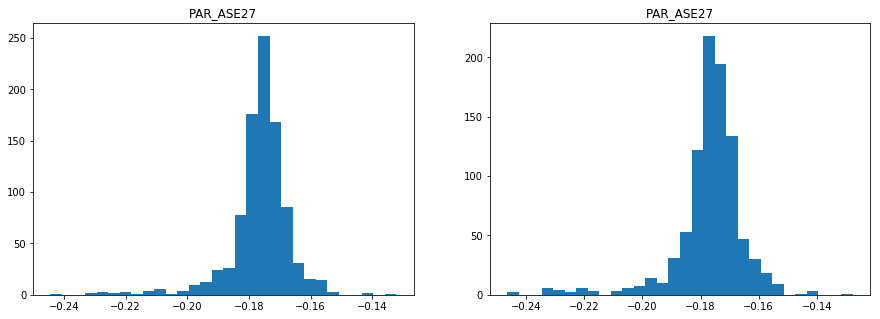

In [54]:
row = np.random.randint(0, X_trdrop.shape[1])
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(X_trdrop.iloc[:,row].name)
plt.hist(X_aux[:,row],30)
plt.subplot(1,2,2)
plt.title(X_trdrop.iloc[:,row].name)
plt.hist(X_trdrop.loc[data_train["GENRE"]==4].iloc[:,row],30);

In [55]:
X_aux = pd.DataFrame(X_aux, columns=X_trdrop.columns)

In [56]:
X_trdrop.shape, X_aux.shape

((12495, 114), (924, 114))

In [57]:
X_new = pd.concat([X_trdrop, X_aux])
y_new = np.concatenate((y_trdrop,np.ones(X_aux.shape[0])*4))

In [58]:
y_new = y_new.astype(int)

In [59]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_new, y_new)

print(eclf1.score(X_new, y_new))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_65.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [61]:
result.head()

,Genres
Id,
1,1
2,2
3,2
4,6
5,3


In [62]:
print("clase 1: ",np.mean(predict==1)*100)
print("clase 2: ",np.mean(predict==2)*100)
print("clase 3: ",np.mean(predict==3)*100)
print("clase 4: ",np.mean(predict==4)*100)
print("clase 5: ",np.mean(predict==5)*100)
print("clase 6: ",np.mean(predict==6)*100)

clase 1:  7.732057416267943
clase 2:  25.033492822966508
clase 3:  34.27751196172249
clase 4:  2.8708133971291865
clase 5:  11.004784688995215
clase 6:  19.08133971291866


#### mirar como balancear las clases
- Hacer una submission solo con la clase 4, a ver que porcentaje tiene esa clase. TIENE 7.3%

In [ ]:
(0.12773109243697478,
 0.27563025210084036,
 0.24033613445378152,
 0.07394957983193277,
 0.12605042016806722,
 0.15630252100840336)

In [126]:
0.2756/0.1563

1.763275751759437

In [32]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=50, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='soft')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_52.csv')

1.0


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = RandomForestClassifier(n_estimators=15, class_weight="balanced_subsample")
clf2 = DecisionTreeClassifier()
clf3 = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)


eclf1 = VotingClassifier(estimators=[
        ('rfc', clf1), ('dtc', clf2), ('gbc', clf3)], voting='hard')
eclf1 = eclf1.fit(X_trdrop, y_trdrop)

print(eclf1.score(X_trdrop, y_trdrop))

predict = eclf1.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_53.csv')

0.9998399359743898


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [12]:
cvs = cross_val_score(clf, X_trdrop, y_trdrop, n_jobs=2)

In [13]:
cvs

array([0.92677071, 0.92893157, 0.93565426])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_trdrop, y_trdrop, train_size=0.7)

/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8746, 114), (3749, 114), (8746,), (3749,))

In [33]:
sum(y_train==1), sum(y_train==2),sum(y_train==3),sum(y_train==4),sum(y_train==5),sum(y_train==6)

(1155, 2403, 2081, 646, 1099, 1362)

In [33]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
#PAR_ASE29
X_trdrop["PAR_MFCC14"] = data_train["PAR_MFCC14"]
X_testdrop["PAR_MFCC14"] = data_test["PAR_MFCC14"]
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_49.csv')

0.9968787515006002


In [ ]:
X_trdrop.head()

In [32]:
df_col_drop = pd.DataFrame(columns=["col", "CV"])
for col in np.unique(cols_drop):
    df_col_drop = df_col_drop.append({"col":col,
                                      "CV":np.std(data_train[col])/abs(np.mean(data_train[col]))},
                                     ignore_index=True)
df_col_drop.sort_values("CV").tail()

,col,CV
59,PAR_MFCCV7,58.721572
43,PAR_MFCCV10,182.770482
23,PAR_MFCC10,182.770482
47,PAR_MFCCV14,193.925477
27,PAR_MFCC14,193.925477


In [ ]:
df_col_drop = df_col_drop.sort_values("CV")
df_col_drop.loc[df_col_drop["CV"]>0]

In [ ]:
m_col_drop = data_train[["PAR_SFM19","PAR_SFM20","PAR_SFM18","PAR_SFM13","PAR_SFM14","PAR_SFM15","PAR_SFM16"]].corr()

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(m_col_drop, cmap='RdYlGn')
plt.xticks(range(len(m_col_drop.columns)), m_col_drop.columns, rotation=90)
plt.yticks(range(len(m_col_drop.columns)), m_col_drop.columns)

fig.colorbar(cax, shrink=.7, aspect=30);

### Se añadiran las siguientes columnas que tienen el mejor indice de CV entre las columnas eliminadas

In [ ]:
data_train[["PAR_SFM19","PAR_SFM20","PAR_SFM18","PAR_SFM13","PAR_SFM14","PAR_SFM15","PAR_SFM16"]].head()

In [ ]:
# con la media negativa
#cols_add = ["PAR_SFM19","PAR_SFM20","PAR_SFM18","PAR_SFM13","PAR_SFM14","PAR_SFM15","PAR_SFM16"]
#con la media absoluta
cols_add = ["PAR_ASE29","PAR_ASE30", "PAR_ASE31", "PAR_ASE7", "PAR_ASE1", "PAR_ASE6", "PAR_ASE3", "PAR_ASE2",
            "PAR_ASE5", "PAR_ASE4"]
for col in cols_add:
    X_trdrop[col] = data_train[col]
    X_testdrop[col] = data_test[col]

X_trdrop.shape, X_testdrop.shape

In [ ]:
# RESULTADO AÑADIENDO LAS COLUMNAS CON MEDIA NEGATIVA
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_42.csv')

In [ ]:
# RESULTADO AÑADIENDO LAS COLUMNAS CON MEDIA ABSOLUTA
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_43.csv')

In [ ]:
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
score = cross_val_score(clf, X_trdrop,y_trdrop, n_jobs=2, cv=5)

In [ ]:
score, np.mean(score)

In [ ]:
clf = RandomForestClassifier(n_estimators=20, n_jobs=2, class_weight="balanced")
score = cross_val_score(clf, X_trdrop,y_trdrop, n_jobs=2, cv=5)

In [ ]:
score, np.mean(score)

In [ ]:
clf = RandomForestClassifier(n_estimators=20, n_jobs=2, class_weight="balanced")
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(X_testdrop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_44.csv')

#### Voy a probar testeando con los mejores datos defenidos por el CV

In [ ]:
data_train.head()

In [ ]:
def feature_selection(df, p):
    """
    df: dataframe de con las caracteristicas, sin el atributdo target
    p: porcentaje de caracteristicas a utilizar
    """
    cv_cols = pd.DataFrame(columns=["col", "cv"])
    for col in df.columns:
        cv_cols = cv_cols.append({"col":col,"cv":np.std(df[col])/abs(np.mean(df[col]))}, ignore_index=True)
    cv_cols = cv_cols.sort_values("cv")
    idx_f = np.int(len(df.columns)*p)
    cv_cols = cv_cols["col"].iloc[:idx_f].get_values()
    new_df = df[cv_cols]
    
    return new_df

In [ ]:
fs = [0.5,0.55,6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]
scores = []
X = data_train.drop("GENRE", axis=1)
y = data_train["GENRE"]
for i in fs:
    X_new = feature_selection(X,i)
    clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
    scores.append(np.mean(cross_val_score(clf, X_new, y,n_jobs=1, cv=5)))
print(scores)

In [ ]:
X_train = feature_selection(data_train.drop("GENRE", axis=1), p=0.5)
X_test = feature_selection(data_test, p=0.5)
clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_train, y)
print(clf.score(X_train, y))

predict = clf.predict(X_test)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_45.csv')